In [1]:
print("Hello World")

# MODEL 1

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

Hello World


In [2]:
df = pd.read_csv("APPRAISE_NETFLOW.csv").dropna()
# print(df.head(10))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7780805 entries, 0 to 7780804
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   FLOW_ID           int64  
 1   IPV4_SRC_ADDR     object 
 2   IPV4_DST_ADDR     object 
 3   IN_PKTS           int64  
 4   IN_BYTES          int64  
 5   OUT_PKTS          int64  
 6   OUT_BYTES         int64  
 7   FIRST_SWITCHED    int64  
 8   LAST_SWITCHED     float64
 9   L4_SRC_PORT       float64
 10  L4_DST_PORT       float64
 11  TCP_FLAGS         float64
 12  PROTOCOL          float64
 13  PROTOCOL_MAP      object 
 14  TOTAL_FLOWS_EXP   float64
 15  L7_PROTO          float64
 16  L7_PROTO_NAME     object 
 17  ANOMALY_CATEGORY  object 
 18  ANOMALY           float64
dtypes: float64(8), int64(6), object(5)
memory usage: 1.2+ GB
None


In [3]:
df.loc[:,'FLOW_DURATION'] = df['LAST_SWITCHED'] - df['FIRST_SWITCHED']
new_df = df[['FLOW_ID', 'IPV4_SRC_ADDR','IPV4_DST_ADDR', 'FLOW_DURATION','IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS']]


# print(new_df.columns.tolist())
# print(new_df.info())

In [4]:
def change_fourth_octet(ip_source):
    parts = ip_source.split('.')
    parts[3] = '0'
    return '.'.join(parts)

df['IPV4_SRC_ADDR'] = df['IPV4_SRC_ADDR'].apply(change_fourth_octet)



print(df['IPV4_SRC_ADDR'])

0           89.159.255.0
1            189.5.173.0
2           80.158.159.0
3           102.81.138.0
4             96.41.79.0
               ...      
7780800    206.239.123.0
7780801      22.79.101.0
7780802     217.218.58.0
7780803     136.94.240.0
7780804     136.94.240.0
Name: IPV4_SRC_ADDR, Length: 7780805, dtype: object


In [5]:
# these are the columns i chose to run k means on to find clusters
prediction = df[['FLOW_DURATION','IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS']]

# scaling all data
scaler = StandardScaler()
prediction_scaled = scaler.fit_transform(prediction)

# 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(prediction_scaled)
df['cluster'] = cluster_labels


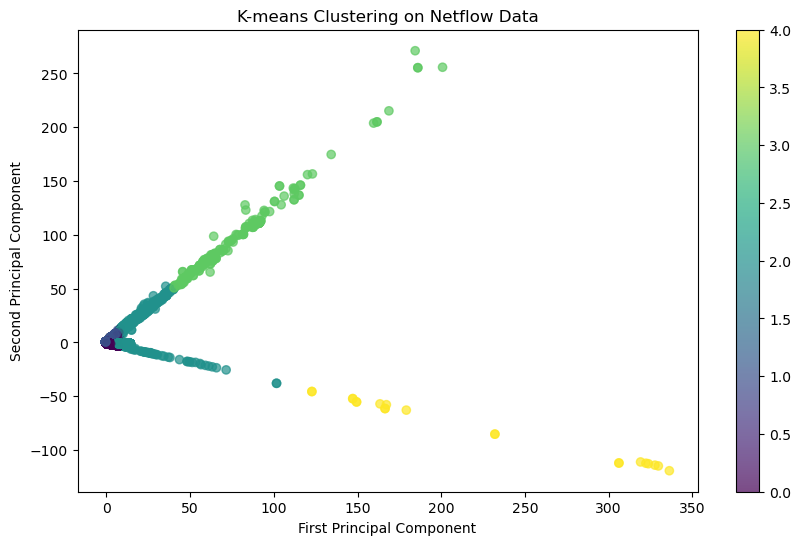

Cluster Centers (scaled):
[[ 1.26944304e+00 -1.53194369e-02 -1.55676186e-02 -4.64118868e-02
  -5.85033489e-02]
 [-6.81601388e-01 -7.18271397e-02 -2.31744703e-02 -1.55213857e-01
  -1.43504662e-01]
 [ 1.86416900e+00  3.24948849e+00  9.37456560e-01  7.49207067e+00
   7.18330616e+00]
 [ 1.19057257e+00  9.30890084e+00  1.34204265e+02  1.79122518e+01
   4.50212800e+01]
 [ 1.60181060e+00  4.99759166e+02  1.02688653e+00  3.78295928e+01
   9.57164153e+00]]

Cluster sizes:
cluster
1    5099316
0    2560535
2     120598
3        335
4         21
Name: count, dtype: int64


In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(prediction_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means Clustering on Netflow Data')
plt.colorbar(scatter)
plt.show()

# Output: Print cluster centers and some stats
print("Cluster Centers (scaled):")
print(kmeans.cluster_centers_)
print("\nCluster sizes:")
print(df['cluster'].value_counts())

# Reverse engineer cluster centers into actual data points, and see if I can find them in the csv (inverse_transform function)

# T-SNE visualization

# Convert IPs into floats

# New model using df[['FLOW_ID', 'IPV4_SRC_ADDR','IPV4_DST_ADDR', 'FLOW_DURATION','IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'PROTOCOL','L7_PROTO','TCP_FLAGS',
# 'L4_DST_PORT',' L4_SRC_PORT']] 

In [ ]:
scaled_centers = kmeans.cluster_centers_
original_centers = scaler.inverse_transform(scaled_centers)

cluster_centers_df = pd.DataFrame(original_centers, columns=prediction.columns)
print(cluster_centers_df)

In [ ]:
# MODEL 2

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df_2 = pd.read_csv("APPRAISE_NETFLOW.csv").dropna()

new_df = df_2[['FLOW_ID', 'IPV4_SRC_ADDR','IPV4_DST_ADDR', 'FIRST_SWITCHED','LAST_SWITCHED','IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'PROTOCOL']]
df_2['FLOW_DURATION'] = df_2['LAST_SWITCHED'] - df_2['FIRST_SWITCHED']

prediction_2 = df_2[['FLOW_DURATION','IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS']]

scaler = StandardScaler()

prediction_scaled = scaler.fit_transform(prediction_2)


In [ ]:
kmeans = KMeans(n_clusters=10, n_init = 10, random_state=5)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(prediction_scaled)

clusters_labeled = kmeans.fit_predict(X_pca)
df_2['clusters'] = clusters_labeled

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_labeled, cmap='viridis', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means Clustering on Netflow Data')
plt.colorbar(scatter)
plt.show()

# Output: Print cluster centers and some stats
print("Cluster Centers (scaled):")
print(kmeans.cluster_centers_)
print("\nCluster sizes:")
print(df_2['clusters'].value_counts())

In [ ]:
# MODEL 3

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

df_2 = pd.read_csv("APPRAISE_NETFLOW.csv").dropna()
new_df = df_2[['FLOW_ID', 'IPV4_SRC_ADDR','IPV4_DST_ADDR', 'FIRST_SWITCHED','LAST_SWITCHED','IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'PROTOCOL']]
df_2['FLOW_DURATION'] = df_2['LAST_SWITCHED'] - df_2['FIRST_SWITCHED']

# no flow duration column
prediction_2 = df_2[['IN_BYTES','OUT_BYTES','IN_PKTS','OUT_PKTS']]
# scaler = StandardScaler()
robust_scaler = RobustScaler()
prediction_scaled = robust_scaler.fit_transform(prediction_2)


In [ ]:
kmeans = KMeans(n_clusters=5, n_init=10, random_state=5)
clusters_labeled = kmeans.fit_predict(prediction_scaled)
df_2['clusters'] = clusters_labeled

pca = PCA(n_components=2)
X_pca = pca.fit_transform(prediction_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_labeled, cmap='viridis', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means Clustering on Netflow Data')
plt.colorbar(scatter)
plt.show()

# Output: Print cluster centers and some stats
print("Cluster Centers (scaled):")
print(kmeans.cluster_centers_)
print("\nCluster sizes:")
print(df_2['clusters'].value_counts())

In [ ]:
# AI CODE

# Create figure with subplots for each feature
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Network Flow Features', fontsize=16, fontweight='bold')

# Features to plot
features = ['IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'FLOW_DURATION']
colors = ['steelblue', 'coral', 'mediumseagreen', 'mediumpurple', 'tomato']

# Plot regular histograms
for idx, (feature, color) in enumerate(zip(features, colors)):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    ax.hist(df_2[feature].dropna(), bins=50, color=color, alpha=0.7, edgecolor='black')
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # Add statistics
    mean_val = df_2[feature].mean()
    median_val = df_2[feature].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    ax.legend(fontsize=9)

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

# Create a second figure with LOG SCALE histograms
fig2, axes2 = plt.subplots(2, 3, figsize=(15, 10))
fig2.suptitle('Log-Scale Distribution of Network Flow Features', fontsize=16, fontweight='bold')

for idx, (feature, color) in enumerate(zip(features, colors)):
    row = idx // 3
    col = idx % 3
    ax = axes2[row, col]
    
    # Filter out zeros for log scale
    data = df_2[feature].dropna()
    data_nonzero = data[data > 0]
    
    ax.hist(np.log10(data_nonzero), bins=50, color=color, alpha=0.7, edgecolor='black')
    ax.set_xlabel(f'log10({feature})', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(f'{feature} Distribution (Log Scale)', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # Add statistics on log scale
    log_mean = np.log10(data_nonzero).mean()
    log_median = np.log10(data_nonzero).median()
    ax.axvline(log_mean, color='red', linestyle='--', linewidth=2, label=f'Log Mean: {log_mean:.2f}')
    ax.axvline(log_median, color='green', linestyle='--', linewidth=2, label=f'Log Median: {log_median:.2f}')
    ax.legend(fontsize=9)

# Remove empty subplot
fig2.delaxes(axes2[1, 2])

plt.tight_layout()
plt.show()

# Print summary statistics
print("="*60)
print("SUMMARY STATISTICS FOR NETWORK FLOW FEATURES")
print("="*60)
for feature in features:
    print(f"\n{feature}:")
    print(f"  Mean:     {df_2[feature].mean():.2f}")
    print(f"  Median:   {df_2[feature].median():.2f}")
    print(f"  Std Dev:  {df_2[feature].std():.2f}")
    print(f"  Min:      {df_2[feature].min():.2f}")
    print(f"  Max:      {df_2[feature].max():.2f}")
    print(f"  Skewness: {df_2[feature].skew():.2f}")

# Check for outliers using IQR method
print("\n" + "="*60)
print("OUTLIER DETECTION (IQR Method)")
print("="*60)
for feature in features:
    Q1 = df_2[feature].quantile(0.25)
    Q3 = df_2[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_2[(df_2[feature] < lower_bound) | (df_2[feature] > upper_bound)]
    print(f"\n{feature}:")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df_2)*100:.2f}%)")
    print(f"  Upper bound: {upper_bound:.2f}")